## Shades of color 

In [1]:
### importing required libraries

import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76


%matplotlib inline

#### Project workflow:
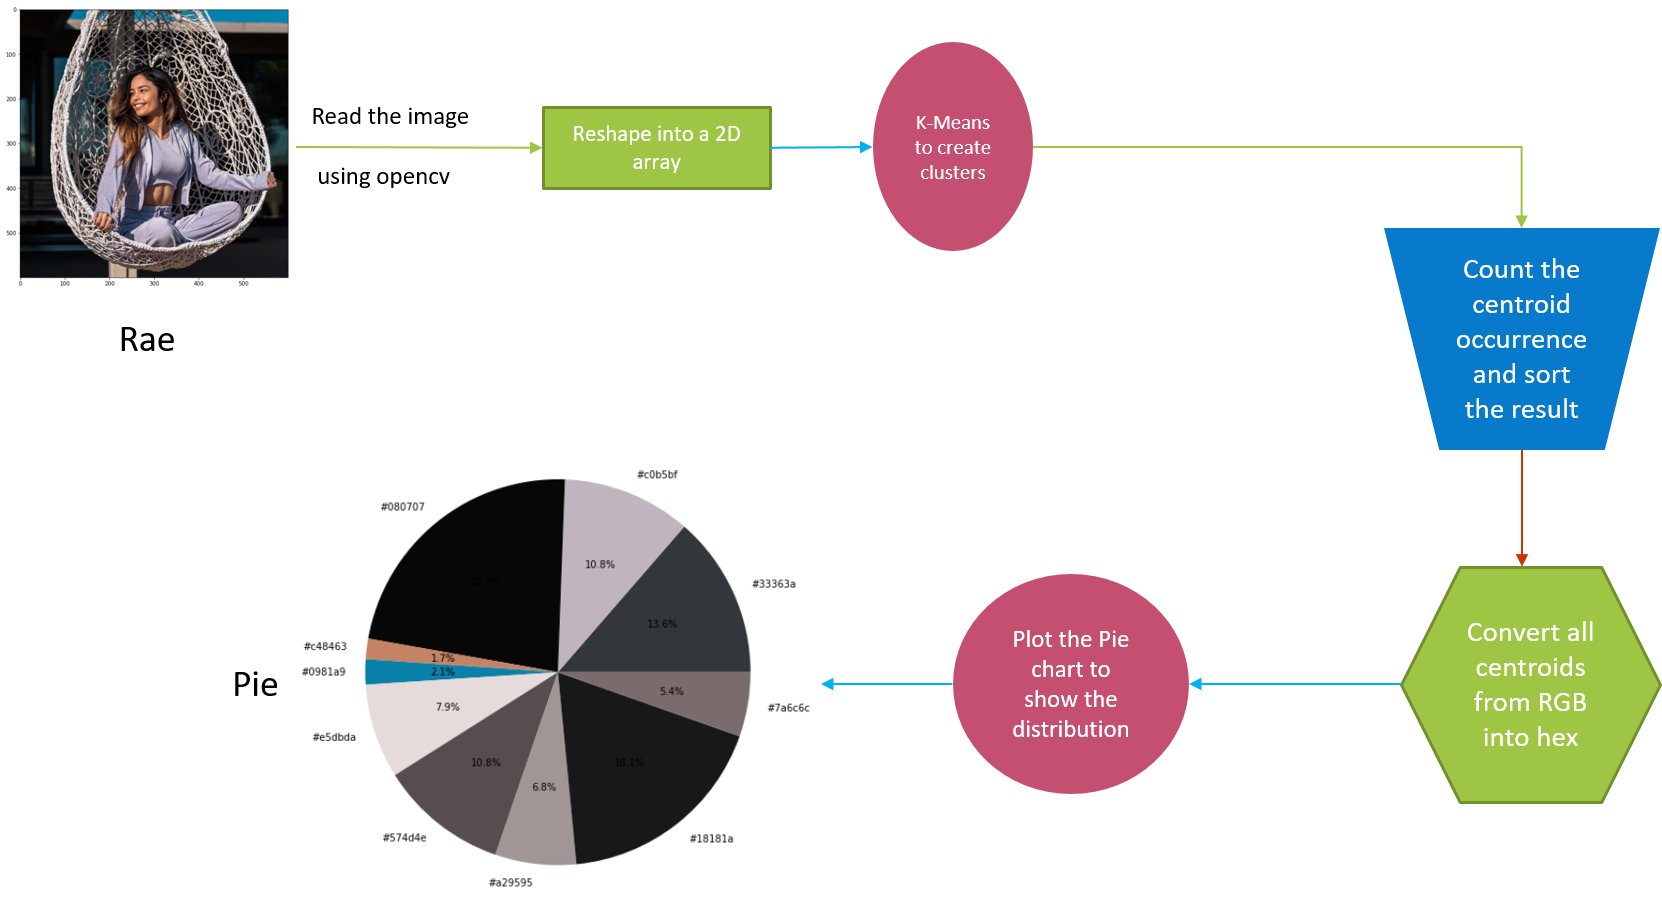

In [2]:
### function which will give the hex value of colors

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [3]:
def find_shades(image_path, number_of_colors):
    
    
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) ### converting from BGR to RGB
    
    resized_image = cv2.resize(image, (600, 600), interpolation = cv2.INTER_AREA) ### resizing to speed up computation

    print("Shape of image before resizing:", resized_image.shape)
    
     ## converting the image array from 3D to 2D for kmeans as KMeans expects flattened array as input during its fit method
    modified_image = resized_image.reshape(resized_image.shape[0]*resized_image.shape[1], 3)
    
    print(modified_image)
    

    print("Shape of image after resizing:", modified_image.shape)
    
    print("---- SEARCH BEGINS ----")
    
    clf = KMeans(n_clusters = number_of_colors,random_state=100
    labels = clf.fit_predict(modified_image)  ### we are getting index numbers for the centroids

    
    counts = Counter(labels) ## we are counting the occurance of centroids 
        
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))### creating a dictionary
                            ## {0: 14918, 1: 22523, 2: 59295}----- here for cetroid '0' count is 14918 
                            ## i.e. 14918 number of points belong to centroid '0'
                            ## sorting to match the index with the clf.cluster_centers_ output

    
    center_colors = clf.cluster_centers_ ### gives the co-ordinates of the centroids
                                    ### we can use these co-ordinates a RGB value for our color shade
    


    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]

    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()] ## converting RGB values into hex 

    rgb_colors = [ordered_colors[i] for i in counts.keys()] ## RGB colors of centroids i.e. color shade clusters
    
    
    ## plotting the pie
    plt.figure(figsize=(20,20))
    
    plt.subplot(2,2,1)
    plt.imshow(resized_image)
    
    plt.subplot(2,2,2)
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,autopct='%1.1f%%')
    plt.show()
    
    print("------ TASK COMPLETED ------")
    
    

Shape of image before resizing: (600, 600, 3)
[[ 6  5  3]
 [ 6  5  3]
 [ 6  5  3]
 ...
 [24 27 32]
 [24 27 32]
 [24 27 32]]
Shape of image after resizing: (360000, 3)
---- SEARCH BEGINS ----


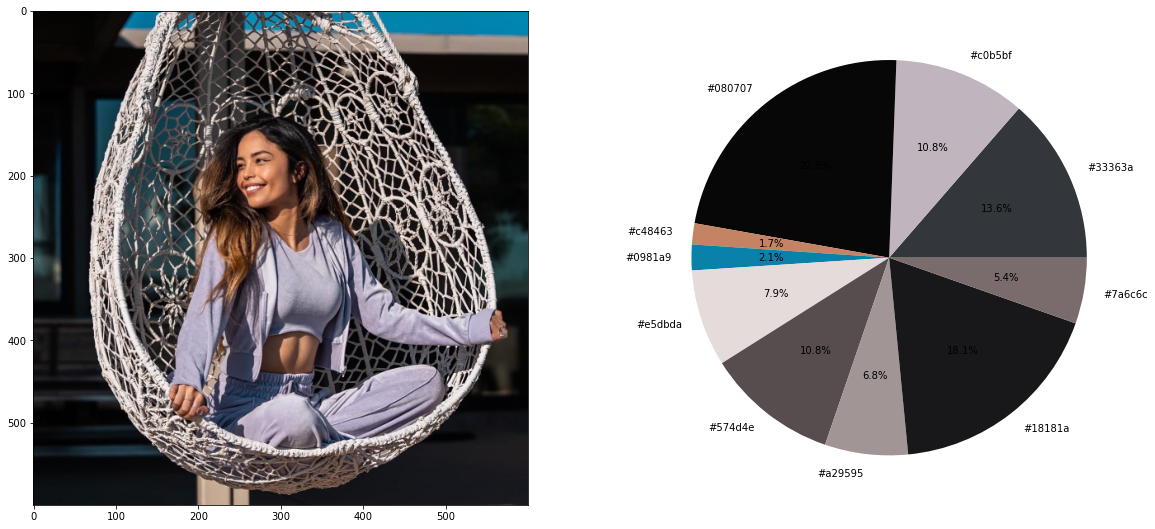

------ TASK COMPLETED ------


In [4]:
find_shades("rae3.jpg",10)

Shape of image before resizing: (600, 600, 3)
[[129 182 224]
 [129 182 224]
 [128 182 228]
 ...
 [ 27  13   4]
 [ 56  43  34]
 [ 63  50  41]]
Shape of image after resizing: (360000, 3)
---- SEARCH BEGINS ----


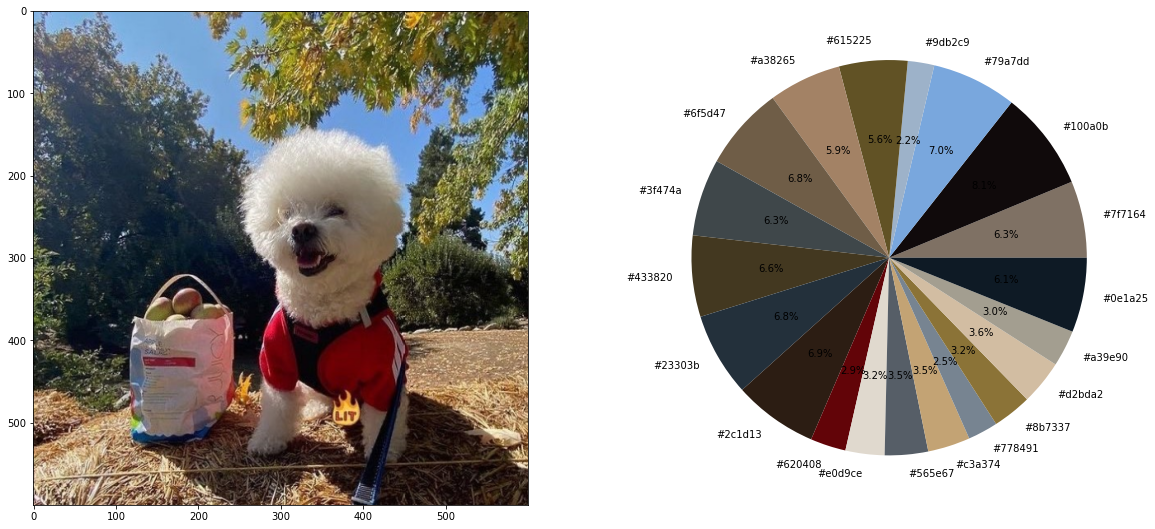

------ TASK COMPLETED ------


In [5]:
find_shades("bimbus.jpg",20)

### Special thanks to : https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71